In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Завантаження даних

In [82]:
df = pd.read_csv('D:\Projects\DS_final_project\data\internet_service_churn.csv')
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\olesy\AppData\Local\Temp\ipykernel_17364\3587805916.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\DS_final_project\data\internet_service_churn.csv')


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Дослідження даних

Досліджуємо розмірність датасету

In [83]:
df.shape

(72274, 11)

Досліджуємо загальну інформацію про датасет

In [84]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8 non-null      float64
 1   is_tv_subscriber             8 non-null      float64
 2   is_movie_package_subscriber  8 non-null      float64
 3   subscription_age             8 non-null      float64
 4   bill_avg                     8 non-null      float64
 5   reamining_contract           8 non-null      float64
 6   service_failure_count        8 non-null      float64
 7   download_avg                 8 non-null      float64
 8   upload_avg                   8 non-null      float64
 9   download_over_limit          8 non-null      float64
 10  churn                        8 non-null      float64
dtypes: float64(11)
memory usage: 768.0+ bytes


Переглядаємо скільки маємо пропущених даних

In [85]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

Досліджуємо типи даних датасету

In [86]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

Досліджуємо основні характеристики датасету

In [87]:
df[['is_tv_subscriber', 
    'is_movie_package_subscriber',
    'subscription_age',
    'bill_avg',
    'reamining_contract',
    'service_failure_count',
    'download_avg',
    'upload_avg',
    'download_over_limit']].describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
count,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000
mean,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613
std,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123
min,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000
50%,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000
75%,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000
max,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000


Перевіряємо наявність дублікатів даних

In [88]:
df['id'].duplicated().sum()

0

Перевіряємо зміст даних датасету

In [89]:
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

## Візуалізація даних

Будуємо кореляційну матрицю

In [90]:
correlation  = df[['is_tv_subscriber', 'is_movie_package_subscriber',
                   'subscription_age', 'bill_avg', 'reamining_contract',
                   'service_failure_count', 'download_avg', 'upload_avg',
                   'download_over_limit', 'churn']].corr()

correlation

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
is_tv_subscriber,1.000000,0.337435,0.087276,-0.076245,0.178814,-0.016041,0.131650,0.065791,-0.103546,-0.327582
is_movie_package_subscriber,0.337435,1.000000,0.131986,-0.022534,0.319179,0.013345,0.160590,0.093251,-0.026352,-0.307167
subscription_age,0.087276,0.131986,1.000000,0.067329,0.039269,0.003449,0.069331,0.030277,0.023694,-0.122441
bill_avg,-0.076245,-0.022534,0.067329,1.000000,-0.057088,0.101270,0.431674,0.334236,-0.232738,-0.021058
reamining_contract,0.178814,0.319179,0.039269,-0.057088,1.000000,-0.012571,0.167568,0.073651,-0.050014,-0.625450
service_failure_count,-0.016041,0.013345,0.003449,0.101270,-0.012571,1.000000,0.080483,0.070699,0.004947,0.021575
download_avg,0.131650,0.160590,0.069331,0.431674,0.167568,0.080483,1.000000,0.554436,-0.114322,-0.298063
upload_avg,0.065791,0.093251,0.030277,0.334236,0.073651,0.070699,0.554436,1.000000,-0.069192,-0.162690
download_over_limit,-0.103546,-0.026352,0.023694,-0.232738,-0.050014,0.004947,-0.114322,-0.069192,1.000000,0.158318
churn,-0.327582,-0.307167,-0.122441,-0.021058,-0.625450,0.021575,-0.298063,-0.162690,0.158318,1.000000


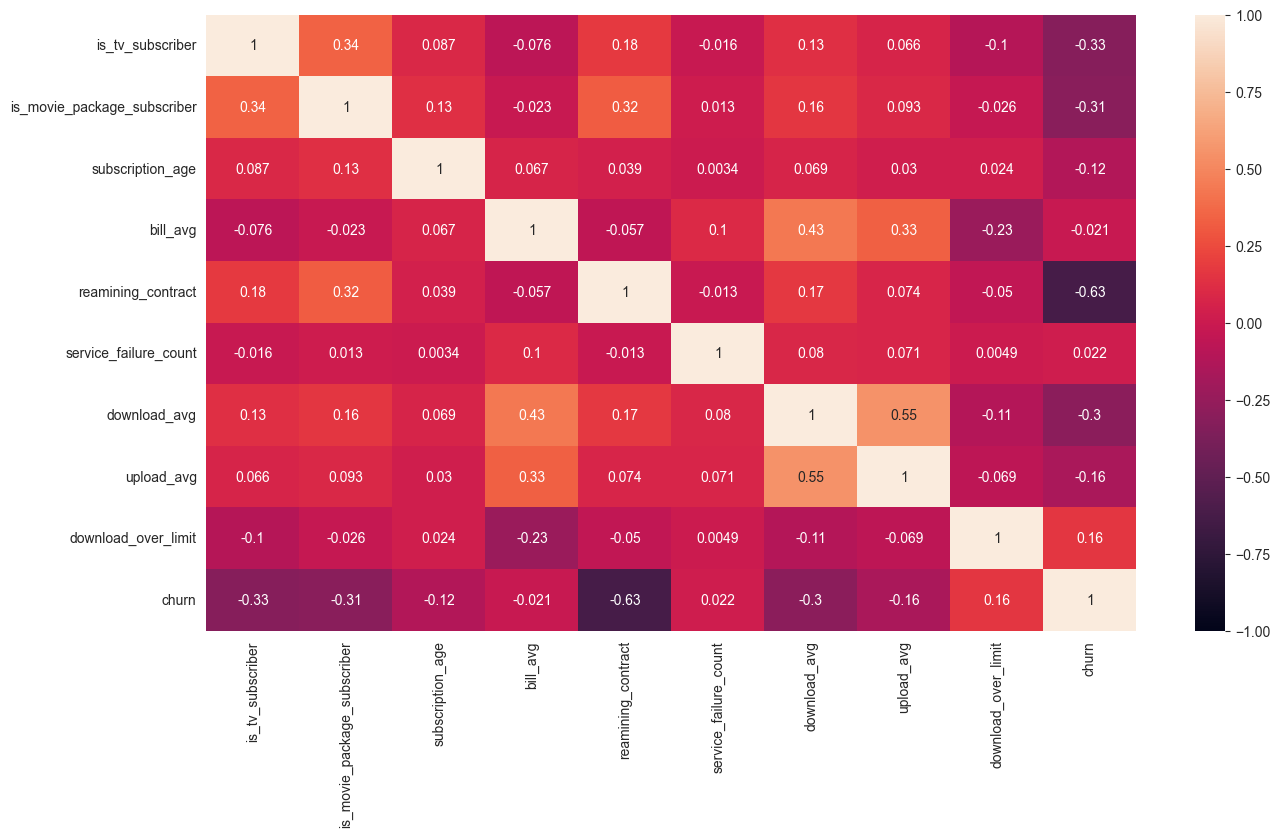

In [91]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True);plt.show()

Відображаєм графічно жалежності згідно з кореляційною матрицею

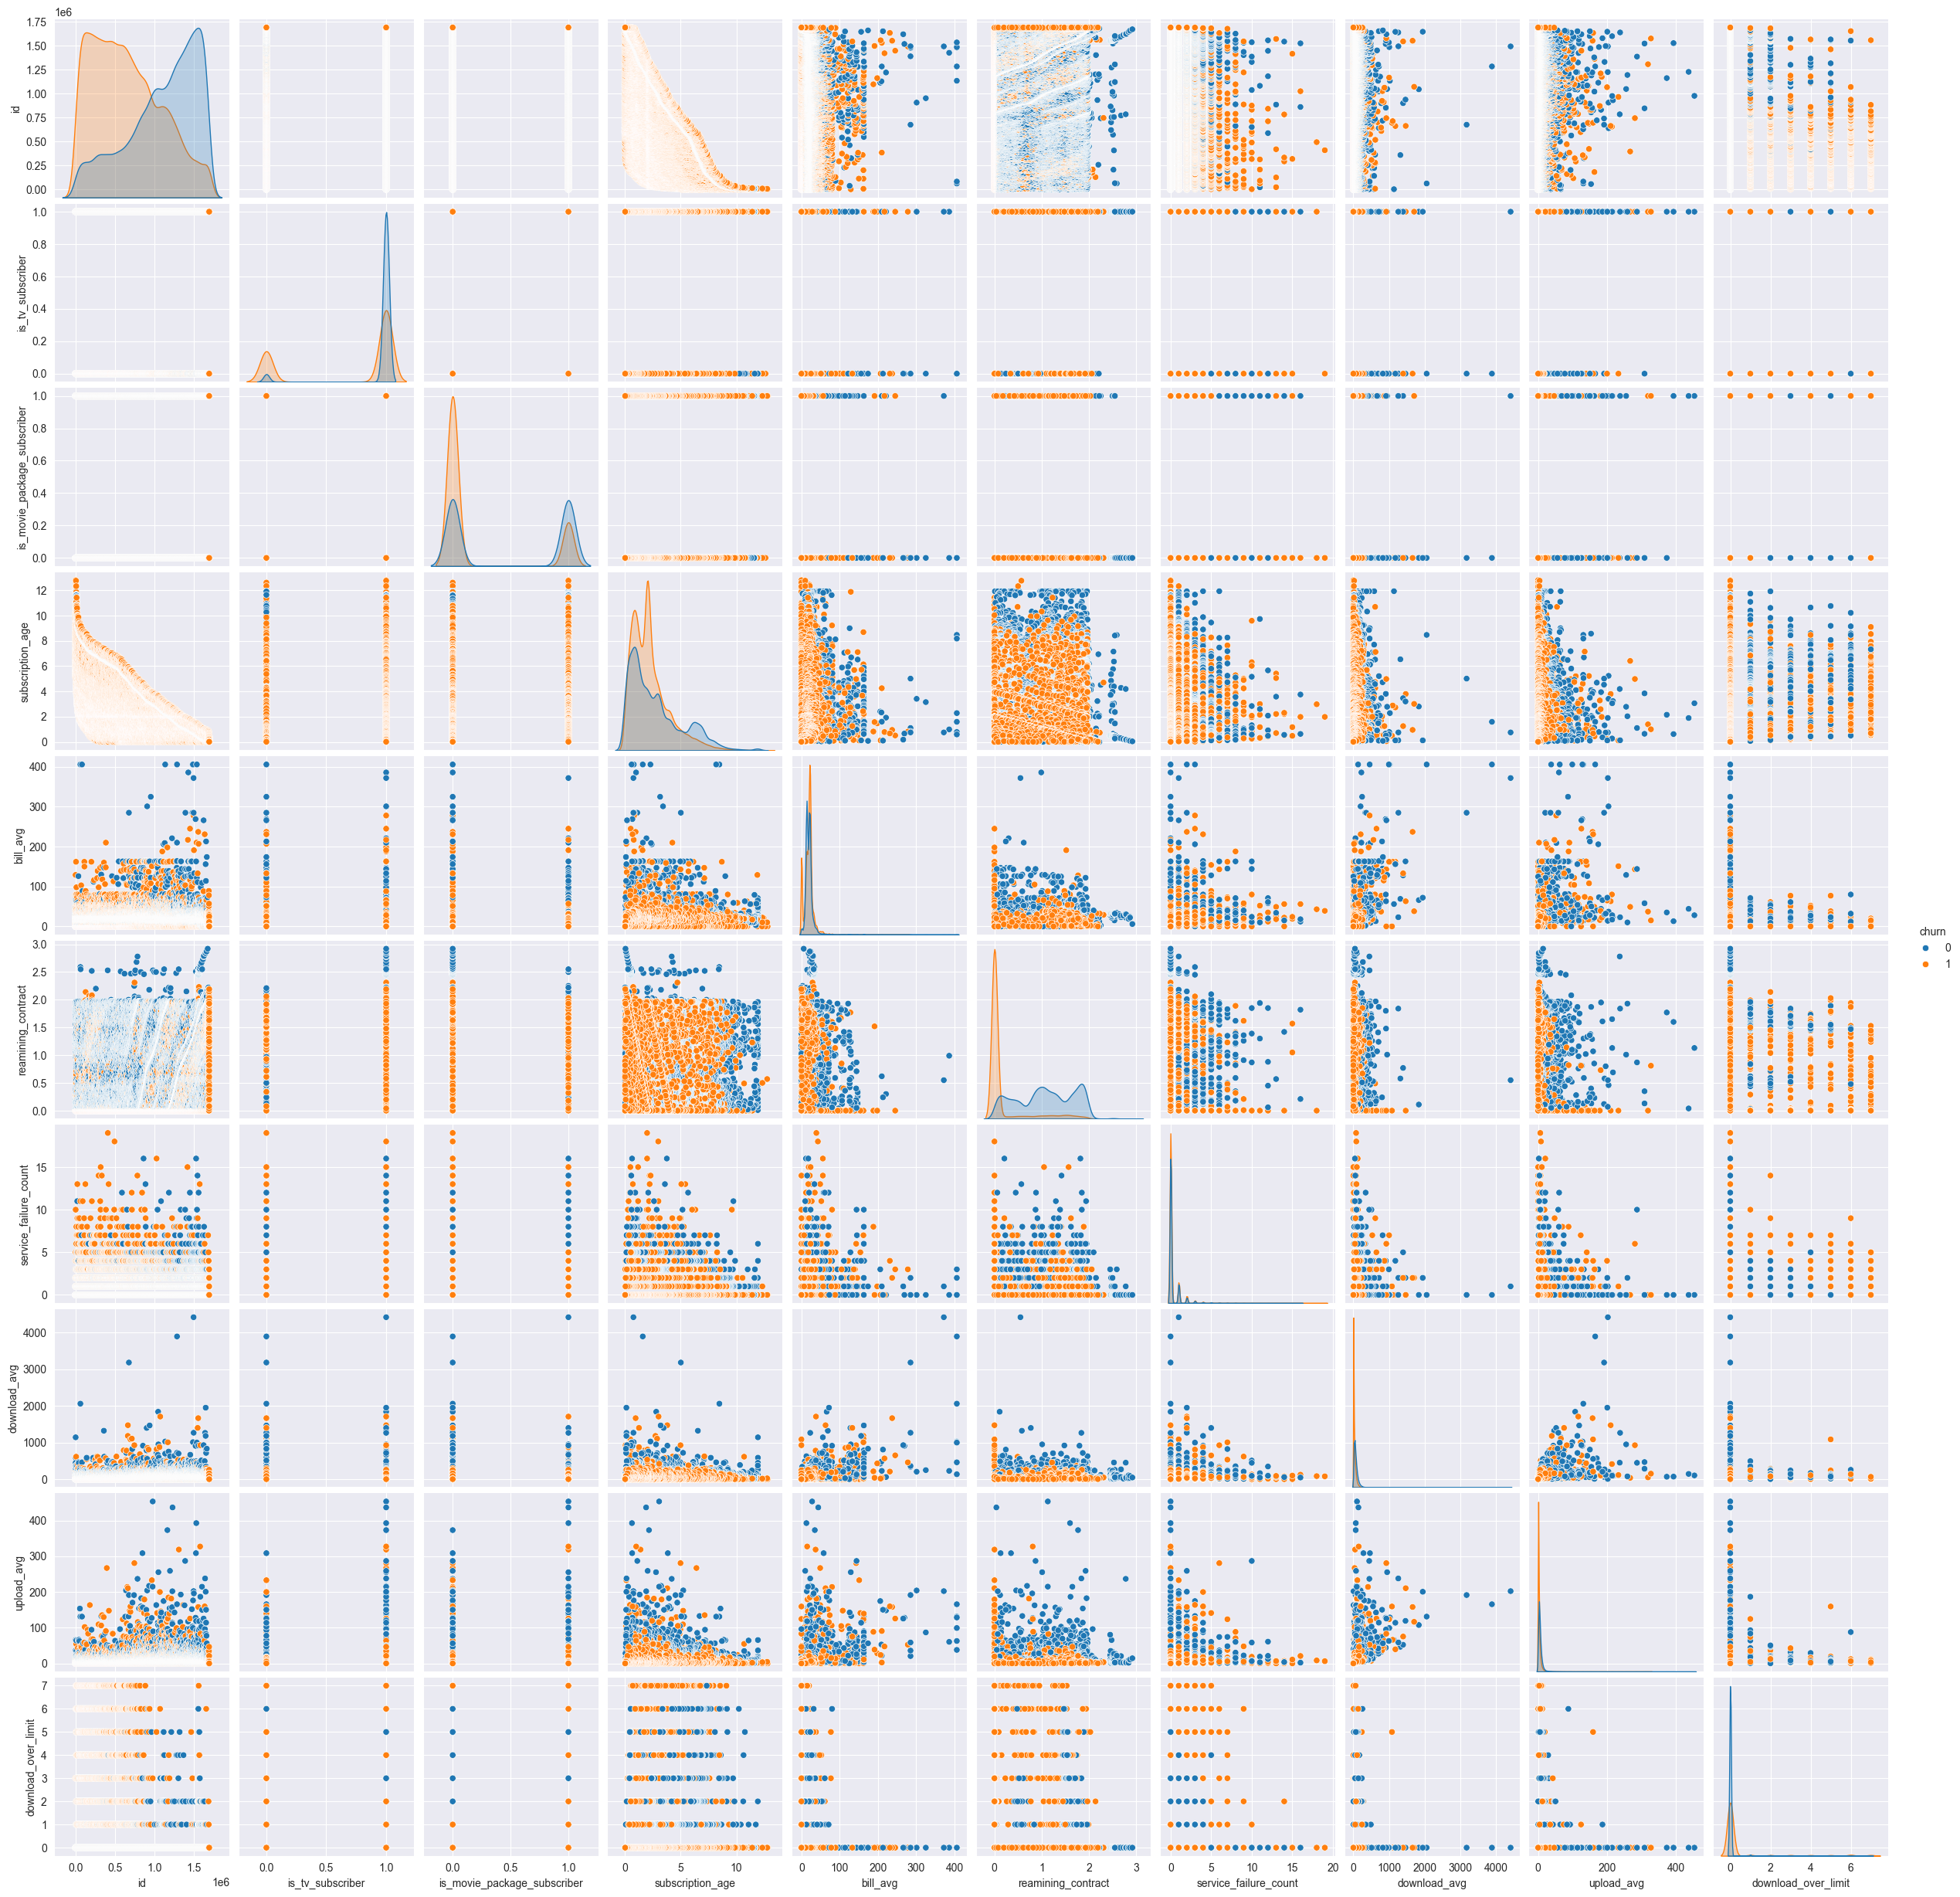

In [92]:
sns.pairplot(df,hue="churn")
plt.show() 

<Axes: xlabel='subscription_age', ylabel='download_avg'>

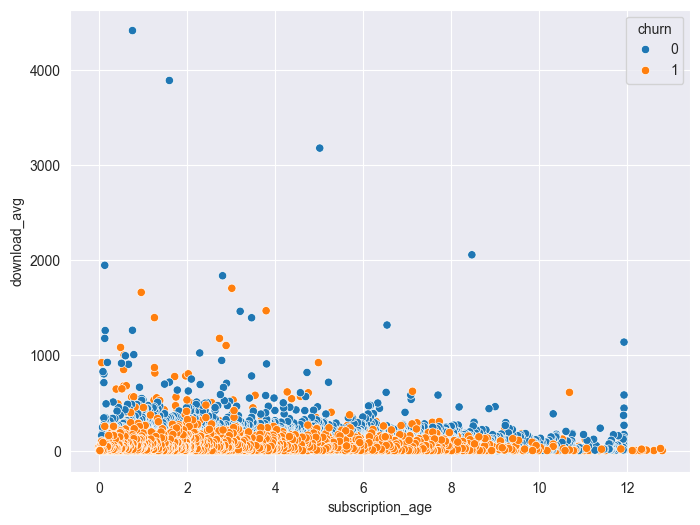

In [93]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='subscription_age', y='download_avg', hue="churn", data=df)

<Axes: xlabel='download_avg', ylabel='reamining_contract'>

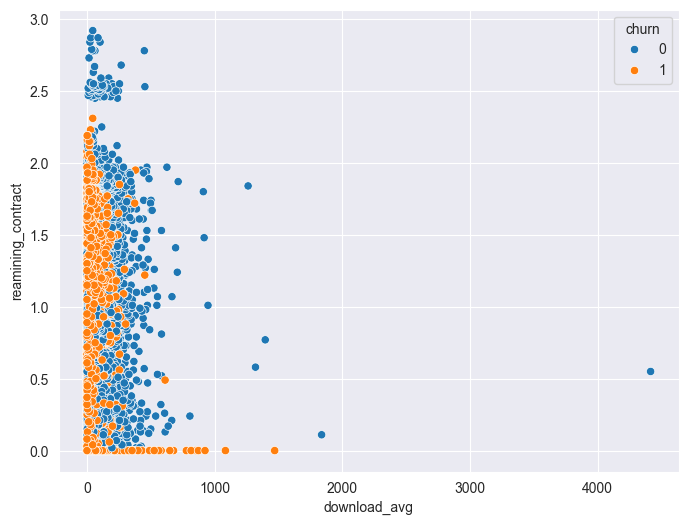

In [94]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='download_avg', y='reamining_contract', hue="churn", data=df)

<Axes: xlabel='bill_avg', ylabel='count'>

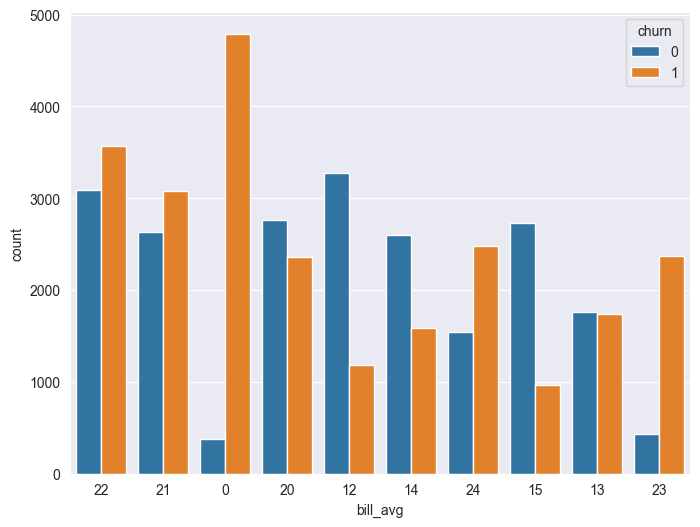

In [95]:
plt.figure(figsize=(8,6))
sns.countplot(x='bill_avg', hue="churn", data=df, order=df['bill_avg'].value_counts().iloc[:10].index)

<Axes: xlabel='subscription_age', ylabel='count'>

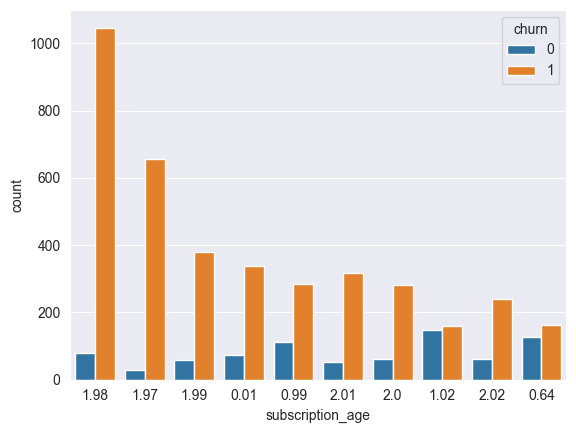

In [96]:
sns.countplot(x='subscription_age', hue="churn", data=df, order=df['subscription_age'].value_counts().iloc[:10].index)

<Axes: xlabel='service_failure_count', ylabel='count'>

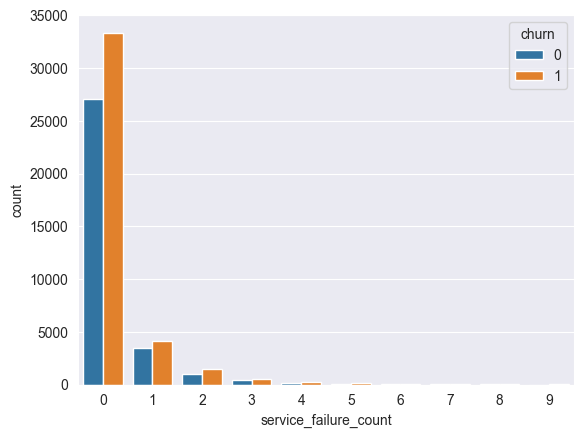

In [97]:
sns.countplot(x='service_failure_count', hue="churn", data=df, order=df['service_failure_count'].value_counts().iloc[:10].index)

<Axes: xlabel='reamining_contract', ylabel='count'>

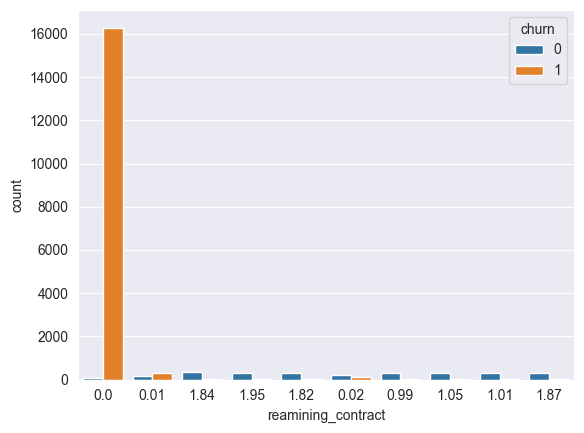

In [98]:
sns.countplot(x='reamining_contract', hue="churn", data=df, order=df['reamining_contract'].value_counts().iloc[:10].index)

## Попередня обробка даних

Створємо нову фічу, яка показує чи є у користувача укладений контракт з компанією чи ні.

In [99]:
df['contract'] = df['reamining_contract'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)
df.insert(5, 'contract', df.pop('contract'))
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,NaN,0,0.0,0.0,0,1


Замінюємо пропущені дані в колонці reamining_contract на нуль

In [100]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


Замінюємо на 0, пропущені дані в колонках download_avg та upload_avg

In [101]:
df['download_avg'] = df['download_avg'].fillna(0)
df['upload_avg'] = df['upload_avg'].fillna(0)
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,contract,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


In [102]:
df.shape

(72274, 12)

Розділяємо датасет на тренуваль, валідаційні та перевірочні дані.
Вибираємо для перевірочних даних рандомно 500 екземплярів, решту розділяєм на тренувальний та валідаційний датасети.
Застосовуємо до даних SMOTE oversampling.

In [103]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [104]:
test_df = df.sample(n=5000, random_state=1)
train_df = df.drop(test_df.index)

In [105]:
test_X = test_df.drop(test_df[['id', 'churn']], axis=1)
test_Y = test_df['churn']

In [106]:
X = train_df.drop(df[['id', 'churn']], axis=1)
Y = train_df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((47091, 10), (20183, 10))

In [107]:
smote = SMOTE()

X_train, y_train = smote.fit_resample(X_train, y_train)

## LogisticRegression

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Маштабуємо дані для всіх моделей

In [110]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [199]:
joblib.dump(scaler,'../models/scaler_Olesia.pkl')

['../models/scaler_Olesia.pkl']

Підбираємо оптимальні параметри для моделі лінійної рересії

In [160]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],             
}

In [161]:
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........................C=0.0001;, score=0.924 total time=   0.0s
[CV 2/5] END ..........................C=0.0001;, score=0.918 total time=   0.0s
[CV 3/5] END ..........................C=0.0001;, score=0.924 total time=   0.0s
[CV 4/5] END ..........................C=0.0001;, score=0.924 total time=   0.0s
[CV 5/5] END ..........................C=0.0001;, score=0.915 total time=   0.0s
[CV 1/5] END ...........................C=0.001;, score=0.925 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.919 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.925 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.925 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.916 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.925 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

{'C': 0.1}

In [162]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

In [163]:
model = LogisticRegression(C=0.1)
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9220631224297676
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9087
           1       0.95      0.90      0.93     11096

    accuracy                           0.92     20183
   macro avg       0.92      0.92      0.92     20183
weighted avg       0.92      0.92      0.92     20183



In [164]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],             
}
grid = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ..........................C=0.0001;, score=0.921 total time=   0.0s
[CV 2/5] END ..........................C=0.0001;, score=0.917 total time=   0.0s
[CV 3/5] END ..........................C=0.0001;, score=0.920 total time=   0.0s
[CV 4/5] END ..........................C=0.0001;, score=0.921 total time=   0.0s
[CV 5/5] END ..........................C=0.0001;, score=0.911 total time=   0.0s
[CV 1/5] END ...........................C=0.001;, score=0.921 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.916 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.920 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.921 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.911 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.925 total time=   0.0s
[CV 2/5] END .............................C=0.1;,

{'C': 10}

In [165]:
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9220135757815984
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9087
           1       0.95      0.90      0.93     11096

    accuracy                           0.92     20183
   macro avg       0.92      0.92      0.92     20183
weighted avg       0.92      0.92      0.92     20183



In [166]:
param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]   
}
grid = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ............C=0.0001, l1_ratio=0.1;, score=0.924 total time=   0.0s
[CV 2/5] END ............C=0.0001, l1_ratio=0.1;, score=0.918 total time=   0.0s
[CV 3/5] END ............C=0.0001, l1_ratio=0.1;, score=0.923 total time=   0.0s
[CV 4/5] END ............C=0.0001, l1_ratio=0.1;, score=0.924 total time=   0.0s
[CV 5/5] END ............C=0.0001, l1_ratio=0.1;, score=0.914 total time=   0.0s
[CV 1/5] END ............C=0.0001, l1_ratio=0.2;, score=0.921 total time=   0.0s
[CV 2/5] END ............C=0.0001, l1_ratio=0.2;, score=0.917 total time=   0.0s
[CV 3/5] END ............C=0.0001, l1_ratio=0.2;, score=0.920 total time=   0.0s
[CV 4/5] END ............C=0.0001, l1_ratio=0.2;, score=0.921 total time=   0.0s
[CV 5/5] END ............C=0.0001, l1_ratio=0.2;, score=0.911 total time=   0.0s
[CV 1/5] END ............C=0.0001, l1_ratio=0.3;, score=0.921 total time=   0.0s
[CV 2/5] END ............C=0.0001, l1_ratio=0.3

{'C': 0.1, 'l1_ratio': 0.1}

In [167]:
model = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.1, max_iter=1000)
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9220135757815984
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9087
           1       0.95      0.90      0.93     11096

    accuracy                           0.92     20183
   macro avg       0.92      0.92      0.92     20183
weighted avg       0.92      0.92      0.92     20183



In [168]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9142
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2239
           1       0.95      0.89      0.92      2761

    accuracy                           0.91      5000
   macro avg       0.91      0.92      0.91      5000
weighted avg       0.92      0.91      0.91      5000



In [169]:
from sklearn.metrics import confusion_matrix

Text(0.5, 3.722222222222216, 'Predicted')

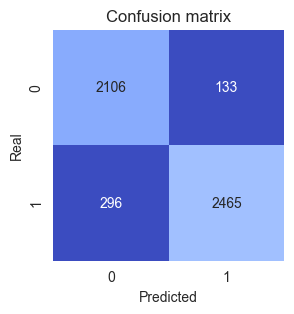

In [170]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Як можемо бачити по виведених вище підсумках, модель сформована на лінійній регресії показує точніть передбачення у 91%.
Тож, зберігаємо модель.

In [174]:
from pathlib import Path

Path('../models').mkdir(parents=True, exist_ok=True)

In [175]:
import joblib

joblib.dump(model,'../models/LR_model_Olesia.pkl')

['../models/LR_model_Olesia.pkl']

### Linear SVC for big dataset

In [176]:
from sklearn.svm import LinearSVC

Підбираємо оптимальні параметри

In [177]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

In [178]:
grid = GridSearchCV(LinearSVC(loss='squared_hinge'), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, penalty=l1;, score=0.923 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l1;, score=0.917 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l1;, score=0.921 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l1;, score=0.922 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l1;, score=0.912 total time=   0.0s
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.923 total time=   0.0s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.917 total time=   0.0s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.921 total time=   0.0s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.922 total time=   0.0s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.912 total time=   0.0s
[CV 1/5] END ...................C=1, penalty=l1;, score=0.923 total time=   0.0s
[CV 2/5] END ...................C=1, penalty=l1;,

{'C': 0.1, 'penalty': 'l1'}

Тренуємо модель

In [179]:
model = LinearSVC(C=0.1, penalty='l1')

model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9190407768914433
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9087
           1       0.95      0.90      0.92     11096

    accuracy                           0.92     20183
   macro avg       0.92      0.92      0.92     20183
weighted avg       0.92      0.92      0.92     20183



Перевіряємо модель на перевірочному датасеті

In [180]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9124
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2239
           1       0.95      0.89      0.92      2761

    accuracy                           0.91      5000
   macro avg       0.91      0.92      0.91      5000
weighted avg       0.91      0.91      0.91      5000



Text(0.5, 3.722222222222216, 'Predicted')

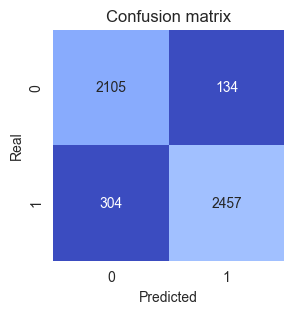

In [181]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Лінійна модель опорних векторів показала себе теж досить непогано та має точність передбачення у 91%.
Тож, також збережемо дану модель.

In [182]:
joblib.dump(model,'../models/LSVC_model_Olesia.pkl')

['../models/LSVC_model_Olesia.pkl']

### Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

Підбираємо оптимальні параметри для моделі

In [132]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [133]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True, verbose=5)

grid.fit(X_train_scaler, y_train)
best_params = grid.best_params_

best_params

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ....................criterion=gini;, score=0.911 total time=   0.1s
[CV 2/5] END ....................criterion=gini;, score=0.907 total time=   0.1s
[CV 3/5] END ....................criterion=gini;, score=0.908 total time=   0.1s
[CV 4/5] END ....................criterion=gini;, score=0.910 total time=   0.1s
[CV 5/5] END ....................criterion=gini;, score=0.903 total time=   0.1s
[CV 1/5] END .................criterion=entropy;, score=0.912 total time=   0.1s
[CV 2/5] END .................criterion=entropy;, score=0.907 total time=   0.1s
[CV 3/5] END .................criterion=entropy;, score=0.914 total time=   0.1s
[CV 4/5] END .................criterion=entropy;, score=0.909 total time=   0.1s
[CV 5/5] END .................criterion=entropy;, score=0.906 total time=   0.1s
[CV 1/5] END ................criterion=log_loss;, score=0.910 total time=   0.1s
[CV 2/5] END ................criterion=log_loss;,

{'criterion': 'entropy'}

Навчаємо модель та тестуємо на валідаційних даних

In [183]:
model = DecisionTreeClassifier(criterion='entropy')

selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

linear_X_train_selected = selector.transform(X_train)
linear_X_test_selected = selector.transform(X_test)

model.fit(linear_X_train_selected, y_train)
y_pred = model.predict(linear_X_test_selected)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9046722489223604
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      9087
           1       0.92      0.91      0.91     11096

    accuracy                           0.90     20183
   macro avg       0.90      0.90      0.90     20183
weighted avg       0.90      0.90      0.90     20183



In [184]:
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9084377941832235
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      9087
           1       0.92      0.91      0.92     11096

    accuracy                           0.91     20183
   macro avg       0.91      0.91      0.91     20183
weighted avg       0.91      0.91      0.91     20183



Тестуємо модель на перевірочних даних

In [185]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9056
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2239
           1       0.92      0.91      0.91      2761

    accuracy                           0.91      5000
   macro avg       0.90      0.91      0.90      5000
weighted avg       0.91      0.91      0.91      5000



Text(0.5, 3.722222222222216, 'Predicted')

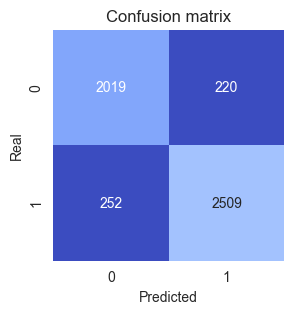

In [186]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Сформавана модель на основі дерева рішень показала один із найкращих результатів при тестуванні, а саме 91%, тому зберігаємо її

In [138]:
joblib.dump(model,'../models/DTC_model_Olesia.pkl')

['../models/DTC_model_Olesia.pkl']

### Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

Підбираємо найкрщі параметри для моделі

In [140]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10],
    'min_samples_leaf': [1, 4, 8],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, refit=True, verbose=2, cv=5)

grid_search.fit(X_train_scaler, y_train)

grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

Навчаємо та тренуємо модель

In [187]:
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200)

model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.9382648763811128
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9087
           1       0.95      0.93      0.94     11096

    accuracy                           0.94     20183
   macro avg       0.94      0.94      0.94     20183
weighted avg       0.94      0.94      0.94     20183



Тестуємо модель на перевірочному датасеті

In [188]:
test_X_scaler = scaler.transform(test_X)

y_pred = model.predict(test_X_scaler)

print(accuracy_score(test_Y, y_pred))

print(classification_report(test_Y, y_pred))

0.9338
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2239
           1       0.95      0.93      0.94      2761

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



Text(0.5, 3.722222222222216, 'Predicted')

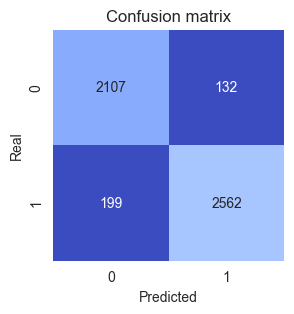

In [189]:
cm = confusion_matrix(test_Y, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Модель "Випадковий ліс" показала точність передбачення у розмірі 93%, тож зберігаємо модель.

In [190]:
joblib.dump(model,'../models/RF_model_Olesia.pkl')

['../models/RF_model_Olesia.pkl']

### Neural Network

Формуємо та вибираємо модель нейронної мережі з найкращими параметрами

In [191]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l2

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6799 - loss: 1.0637 - val_accuracy: 0.9137 - val_loss: 0.3093
Epoch 2/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3711 - val_accuracy: 0.9252 - val_loss: 0.2655
Epoch 3/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.2989 - val_accuracy: 0.9297 - val_loss: 0.2379
Epoch 4/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9217 - loss: 0.2622 - val_accuracy: 0.9291 - val_loss: 0.2521
Epoch 5/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2587 - val_accuracy: 0.9283 - val_loss: 0.2545
Epoch 6/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9300 - loss: 0.2372 - val_accuracy: 0.9252 - val_loss: 0.3211
Epoch 7/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9288 - loss: 0.2368 - val_accuracy: 0.9280 - val_loss: 0.2765
Epoch 8/20
1146/1146 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9278 - loss: 0.2400 - 

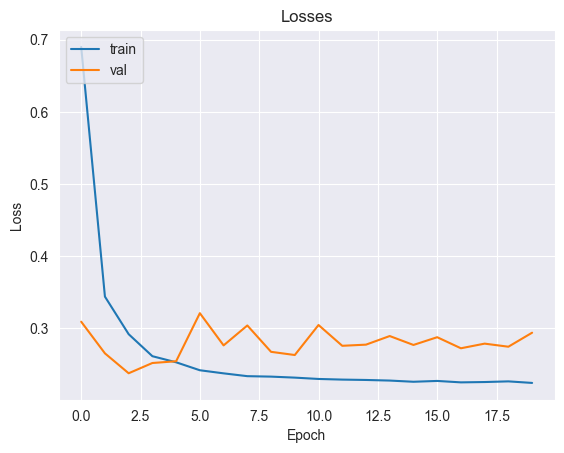

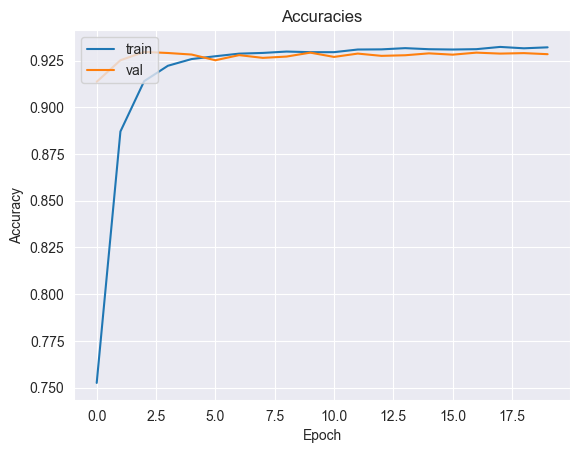

In [146]:
history = model.fit(
    X_train, y_train, epochs=20,
    batch_size=32,
    validation_split=0.3
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [147]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9121 - loss: 0.2817 - val_accuracy: 0.9239 - val_loss: 0.2399
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9273 - loss: 0.2369 - val_accuracy: 0.9235 - val_loss: 0.2432
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9294 - loss: 0.2301 - val_accuracy: 0.9243 - val_loss: 0.2271
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9272 - loss: 0.2374 - val_accuracy: 0.9240 - val_loss: 0.2436
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9259 - loss: 0.2377 - val_accuracy: 0.9236 - val_loss: 0.2322
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9275 - loss: 0.2372 - val_accuracy: 0.9265 - val_loss: 0.2301
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9296 - loss: 0.2292 - val_accuracy: 0.9236 - val_loss: 0.2444
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9279 - loss: 0.2307 - 

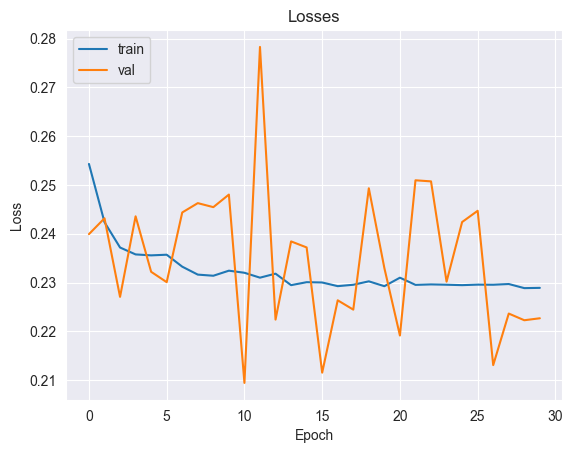

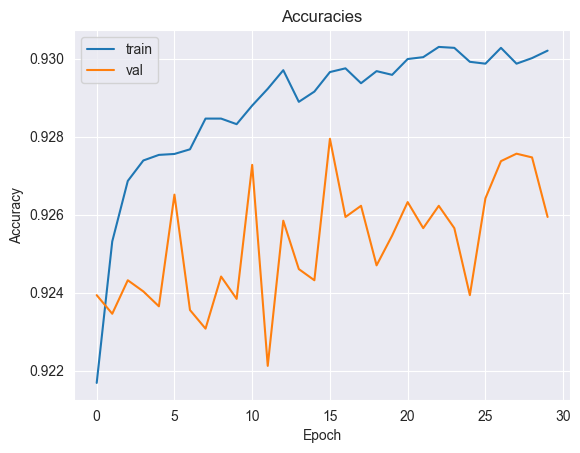

In [148]:
history = model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [149]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8177 - loss: 0.6097 - val_accuracy: 0.9258 - val_loss: 0.3902
Epoch 2/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9211 - loss: 0.3986 - val_accuracy: 0.9278 - val_loss: 0.3753
Epoch 3/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.3917 - val_accuracy: 0.9273 - val_loss: 0.3673
Epoch 4/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9225 - loss: 0.3730 - val_accuracy: 0.9258 - val_loss: 0.3645
Epoch 5/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9226 - loss: 0.3679 - val_accuracy: 0.9257 - val_loss: 0.3517
Epoch 6/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9213 - loss: 0.3611 - val_accuracy: 0.9246 - val_loss: 0.3489
Epoch 7/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.3487 - val_accuracy: 0.9252 - val_loss: 0.3421
Epoch 8/50
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9264 - loss: 0.3409 - 

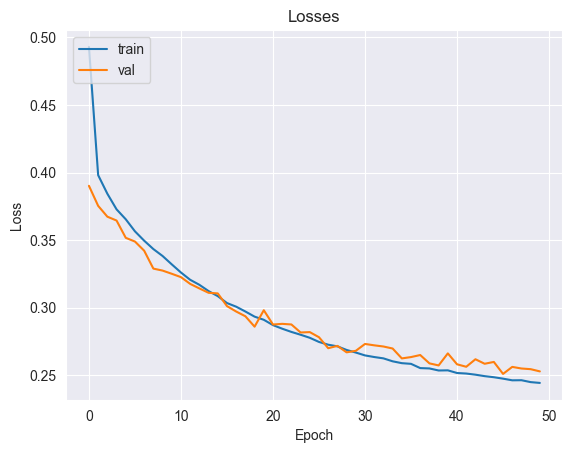

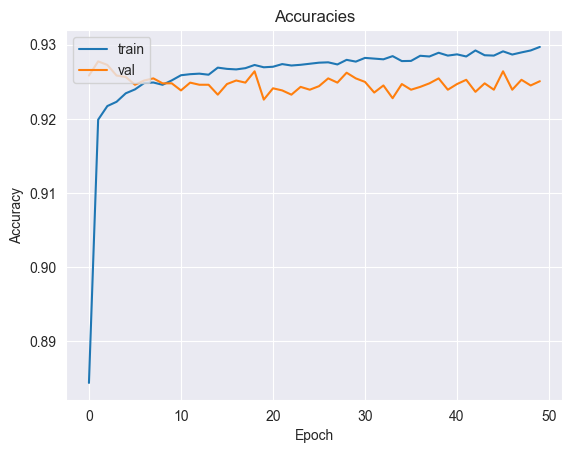

In [150]:
history = model.fit(
    X_train_scaler, y_train, epochs=50,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [151]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8366 - loss: 0.3871 - val_accuracy: 0.9233 - val_loss: 0.2275
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9232 - loss: 0.2555 - val_accuracy: 0.9245 - val_loss: 0.2362
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.2466 - val_accuracy: 0.9245 - val_loss: 0.2213
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9246 - loss: 0.2425 - val_accuracy: 0.9235 - val_loss: 0.2230
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9256 - loss: 0.2408 - val_accuracy: 0.9234 - val_loss: 0.2272
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9296 - loss: 0.2291 - val_accuracy: 0.9238 - val_loss: 0.2237
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2386 - val_accuracy: 0.9210 - val_loss: 0.2350
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9280 - loss: 0.2332 - 

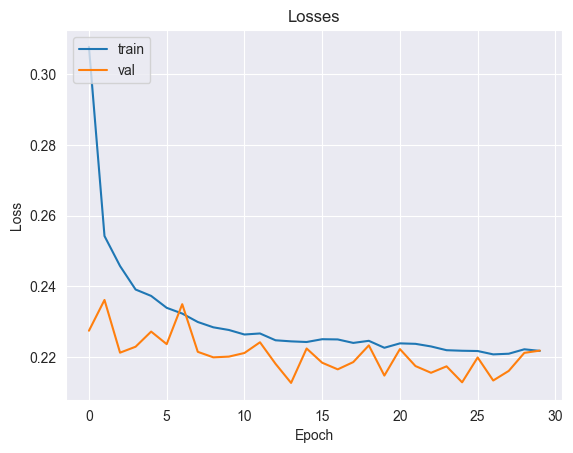

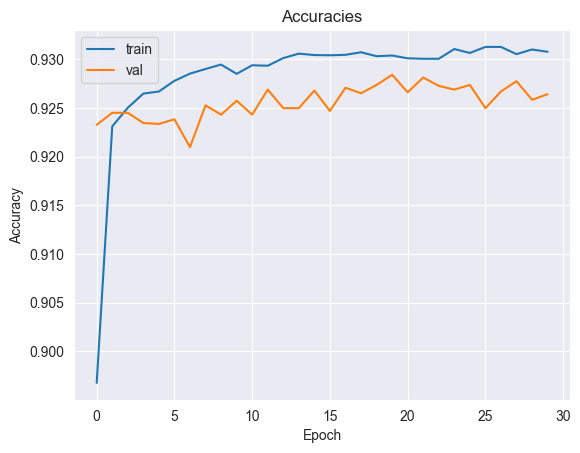

In [152]:
history = model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Найкращі результати при передбаченні показала наступна модель.

In [192]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.fit(
    X_train_scaler, y_train, epochs=30,
    batch_size=32,
    validation_split=0.2,
)

y_pred = model.predict(X_test_scaler)

y_pred_binary = (y_pred >= 0.5).astype(int)

print(classification_report(y_test, y_pred_binary))

Epoch 1/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9154 - loss: 0.2764 - val_accuracy: 0.9243 - val_loss: 0.2470
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2423 - val_accuracy: 0.9242 - val_loss: 0.2317
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9282 - loss: 0.2362 - val_accuracy: 0.9227 - val_loss: 0.2420
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9270 - loss: 0.2374 - val_accuracy: 0.9270 - val_loss: 0.2257
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9308 - loss: 0.2298 - val_accuracy: 0.9253 - val_loss: 0.2278
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.2312 - val_accuracy: 0.9239 - val_loss: 0.2474
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9292 - loss: 0.2296 - val_accuracy: 0.9237 - val_loss: 0.2350
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9299 - loss: 0.2298 - 

Тестування моделі на перевірочному дата сеті

In [195]:
y_pred = model.predict(test_X_scaler)

y_pred_binary = (y_pred >= 0.5).astype(int)

print(classification_report(test_Y, y_pred_binary))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2239
           1       0.95      0.92      0.93      2761

    accuracy                           0.93      5000
   macro avg       0.92      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



Text(0.5, 3.722222222222216, 'Predicted')

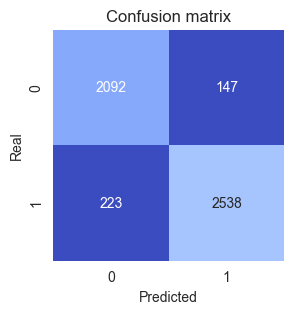

In [196]:
cm = confusion_matrix(test_Y, y_pred_binary)
plt.figure(figsize=(3, 3))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='coolwarm', vmin=900, vmax=6000)
plt.title('Confusion matrix')
plt.ylabel('Real')
plt.xlabel('Predicted')

Дана модель нейронної мережі показала також дуже високий результат точності передбачення, а саме 93%, тому також зберігаємо модель.

In [197]:
joblib.dump(model,'../models/NN_model_Olesia.pkl')

['../models/NN_model_Olesia.pkl']

При виборі моделі протестовано та проаналізовано роботу 5 різних моделей для даного датасету.

Так, наступними моделями було показані такі результати:
Logistic Regression - 91%
Linear SVC(accoding to documentation model used for big datasets) - 91%
Decision Tree - 91%
Random Forest Classifier - 93%
Neural Networks - 93%

Найкращий результат показали модель Decision Tree i Neural Networks.